## Flight Path Pracking
### Max Reinheimer dos Santos Denig
Flight path tracking over a map using mplleaflet Python package.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

os.chdir("\\")
# This sets the working directory, you will need to change this to the path to the folder containing the data

In [4]:
aux = np.loadtxt("weather.txt", dtype=str, delimiter="	")

d = {
    "ap_code" : [row[0] for row in aux], "elev" : list(map(int, [row[1] for row in aux])),
    "time" : [row[2] for row in aux], "pressure" : list(map(int, [row[4] for row in aux])),
    "descr" : [row[6] for row in aux], "wind_dir" : [row[9] for row in aux],
    "wind_speed" : list(map(int, [row[10] for row in aux])), "wind_descr" : [row[11] for row in aux],
    "humid" : list(map(int, [row[12] for row in aux])), "temp" : list(map(int, [row[13] for row in aux]))
    }

wt = pd.DataFrame(d)

del aux, d

wt.head()

,ap_code,elev,time,pressure,descr,wind_dir,wind_speed,wind_descr,humid,temp
0,AMS,-4,2018-11-01 23:55,1008,Rain,From south,18,Mod,94,11
1,BCN,4,2018-11-01 23:30,1018,Cloudy,From northwest,18,Mod,82,11
2,CDG,118,2018-11-01 23:30,1015,Overcast,From southwest,7,Calm,93,9
3,DXB,8,2018-11-01 23:00,1015,Clear,From east,11,Mod,45,27
4,FAO,7,2018-11-01 23:30,1024,Clear,From northwest,14,Mod,82,14


In [5]:
aux = np.loadtxt("distlines.txt", dtype=str, delimiter="	")

d = {
    "ap_orig" : [row[0] for row in aux], "dir_orig" : [row[1] for row in aux],
    "ap_dest" : [row[2] for row in aux], "dir_dest" : [row[3] for row in aux],
    "dist" : list(map(float, [row[4] for row in aux])), "avg_speed" : list(map(float, [row[5] for row in aux])),
    "time" : list(map(float, [row[6] for row in aux])), "plane_reg" : [row[7] for row in aux],
    "plane_model" : [row[8] for row in aux], "time_orig" : [row[9] for row in aux],
    "time_dest" : [row[10] for row in aux], "hex_id" : [row[11] for row in aux]
    }


fl = pd.DataFrame(d)

del aux, d

fl.head()

,ap_orig,dir_orig,ap_dest,dir_dest,dist,avg_speed,time,plane_reg,plane_model,time_orig,time_dest,hex_id
0,SEA,180,IAD,,3392.009,975.494,3.5,N17128,Boeing 757-224ER,2018-10-31 20:30:23,2018-10-31 23:59:01,/1e680781
1,LIS,206,REC,,2271.824,874.713,2.6,9H-SOL,Airbus A340-313,2018-10-31 20:30:22,2018-10-31 23:06:12,/1e6812e7
2,EWR,207,LIM,,3691.428,853.839,4.3,N33132,Boeing 757-224,2018-10-31 19:40:08,2018-10-31 23:59:32,/1e67e78f
3,ADD,74,FRA,,1484.959,800.397,1.9,D-AIGZ,Airbus A340-313,2018-10-31 22:08:28,2018-10-31 23:59:47,/1e6822d5
4,JNB,15,DXB,,2658.146,920.039,2.9,A6-EGU,Boeing 777-31H(ER),2018-10-31 21:05:21,2018-10-31 23:58:42,/1e681a96


In [7]:
data = pd.read_csv("ex.csv", encoding="utf-8") # Simply loads the .csv in the data variable.
data.head(2)

,timestamp,Time,Lat,Lon,Alt[m],Speed(km/h),VSpeed[m/s],x,CalcSpeed[km/h],x2
0,2018-10-02 12:22:02,0.00,39.603325,2.892923,2284,351,16,0.000000,NaN,0.00000
1,2018-10-02 12:22:16,0.23,39.607792,2.908178,2522,333,22,1398.108284,359.513555,1.39811


ModuleNotFoundError: No module named 'mplleaflet'

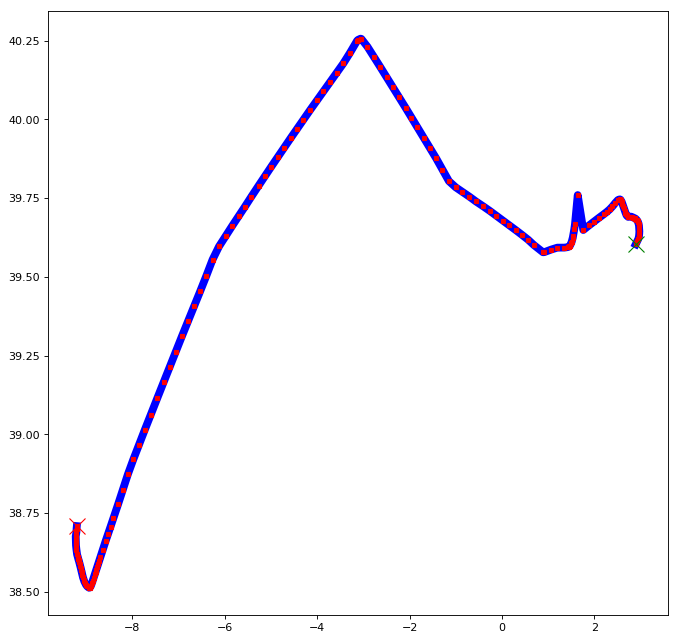

In [8]:
plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(data.Lon, data.Lat, 'b', linewidth=7)
plt.plot(data.Lon, data.Lat, 'rs', markersize=4)

plt.plot(data.Lon.head(1), data.Lat.head(1), 'xg', markersize=15)
plt.plot(data.Lon.tail(1), data.Lat.tail(1), 'xr', markersize=15)
# The code until here is just to easily plot the trajectory of the plane using Latitude and Longitude from the .csv file.
# The 'b' parameter indicates blue line. The 'rs' parameter indicates red squares. The linewidth and markersize parameters
# are pretty straightcorward, they dictate the size of the plot.
# All of these parameters can be changed.


import mplleaflet as mpl # Type 'pip install mplleaflet' into the Anaconda Prompt to install this package.
mpl.display()
# Now we use the display() method of the package mplleaflet to trace the coordinates of the plot over the map of the globe.
# If you want the map with the plot to be a separate window just use the mpl.show() method instead, as the display() works only
# in Jupyter Notebook.


# Each red square is a point of data collected. Data was collected every 20 seconds or so.